In [4]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install --upgrade uarray


Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

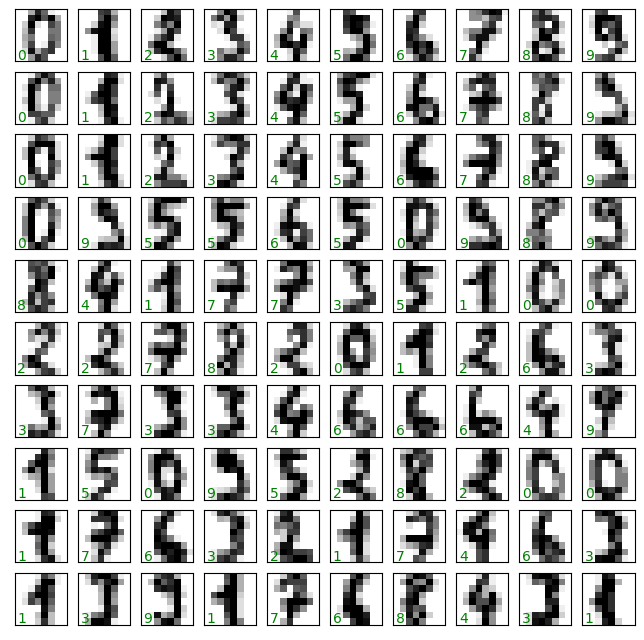

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize =(8,8), subplot_kw = {"xticks":[], "yticks":[]},)
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation = "nearest")
    ax.text(0.05, 0.05, str(digits.target[i]),transform = ax.transAxes, color = "green")

In [11]:
# 藉由把像素陣列平面化，讓一個長度為64像素值陣列可以表示每個數字元
x = digits.data
x.shape

(1797, 64)

In [12]:
# 目標陣列，用來放每個數字元定義的標籤
y = digits.target
y.shape

(1797,)

In [14]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

d:\internship\banbi_yoyo\.venv\lib\site-packages\sklearn\manifold\_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\internship\banbi_yoyo\.venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

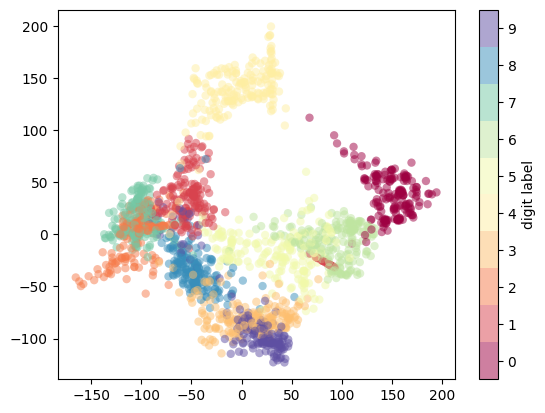

In [21]:
plt.scatter(data_projected[:, 0], 
            data_projected[:, 1], 
            c = digits.target, 
            edgecolor = "none", 
            alpha = 0.5, 
            cmap=plt.cm.get_cmap("Spectral", 10)
            )
plt.colorbar(label="digit label", ticks = range(10))
plt.clim(-0.5, 9.5)

d:\internship\banbi_yoyo\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\internship\banbi_yoyo\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


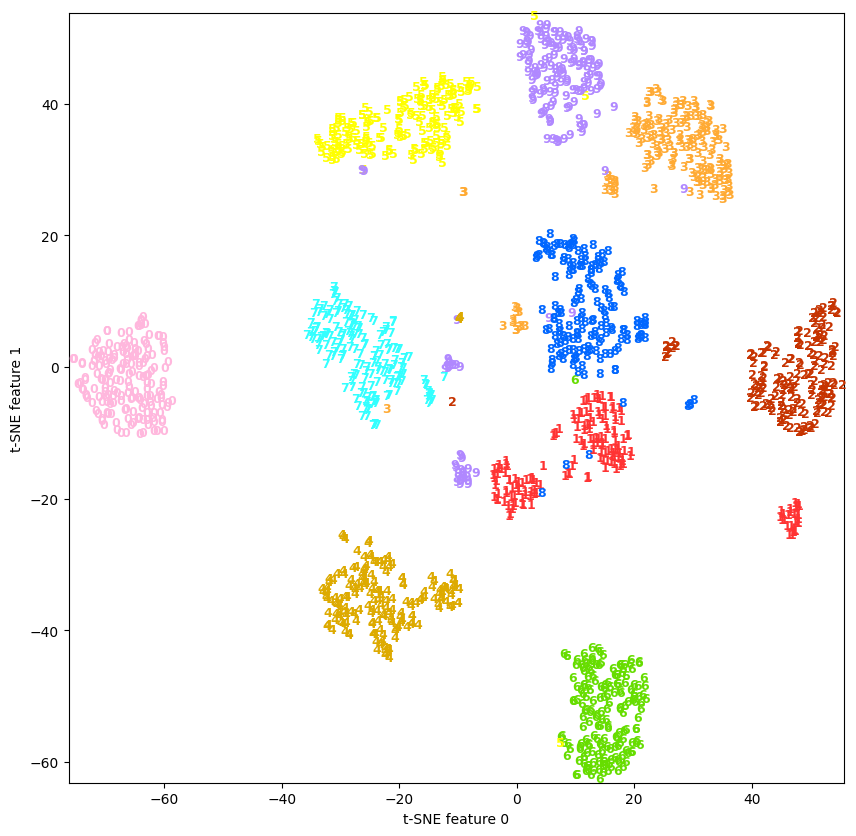

In [22]:
# 导入一个手写数据集（比MNIST数据集小），每个数据点是0-9的一张8*8灰度图像
from sklearn.datasets import load_digits
digits = load_digits()

# 使用t-SNE降维（二维）
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

# 设置字体颜色
colors = ['#FFB7DD', '#FF3333', '#C63300', '#FFAA33', '#DDAA00', 
          '#FFFF00', '#66DD00', '#33FFFF', '#0066FF', '#B088FF']

# 数据可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    # 绘制文本数据
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]), color=colors[digits.target[i]], 
           fontdict={'weight':'bold', 'size':9})
    plt.xlabel('t-SNE feature 0')
    plt.ylabel('t-SNE feature 1')
